In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
import sklearn
from sklearn import datasets, linear_model, model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
import os
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

In [2]:
notebook_path = os.path.abspath("DataAnalysis.ipynb")
temp = os.path.abspath("Data")
df = pd.read_csv(temp + "\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", low_memory = False)

In [3]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('/s', '_s')

In [4]:
df.Label = df.Label.replace('BENIGN', 0)
df.Label = df.Label.replace('DDoS', 1)

In [7]:
df = df[['Label', 'DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes_s', 'FlowPackets_s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets_s',
       'BwdPackets_s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize',
       'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'FwdAvgBytes/Bulk',
       'FwdAvgPackets/Bulk', 'FwdAvgBulkRate', 'BwdAvgBytes/Bulk',
       'BwdAvgPackets/Bulk', 'BwdAvgBulkRate', 'SubflowFwdPackets',
       'SubflowFwdBytes', 'SubflowBwdPackets', 'SubflowBwdBytes',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
       'min_seg_size_forward', 'ActiveMean', 'ActiveStd', 'ActiveMax',
       'ActiveMin', 'IdleMean', 'IdleStd', 'IdleMax', 'IdleMin']]

In [9]:
df.dtypes

Label                        int64
DestinationPort              int64
FlowDuration                 int64
TotalFwdPackets              int64
TotalBackwardPackets         int64
TotalLengthofFwdPackets      int64
TotalLengthofBwdPackets      int64
FwdPacketLengthMax           int64
FwdPacketLengthMin           int64
FwdPacketLengthMean        float64
FwdPacketLengthStd         float64
BwdPacketLengthMax           int64
BwdPacketLengthMin           int64
BwdPacketLengthMean        float64
BwdPacketLengthStd         float64
FlowBytes_s                 object
FlowPackets_s               object
FlowIATMean                float64
FlowIATStd                 float64
FlowIATMax                   int64
FlowIATMin                   int64
FwdIATTotal                  int64
FwdIATMean                 float64
FwdIATStd                  float64
FwdIATMax                    int64
FwdIATMin                    int64
BwdIATTotal                  int64
BwdIATMean                 float64
BwdIATStd           

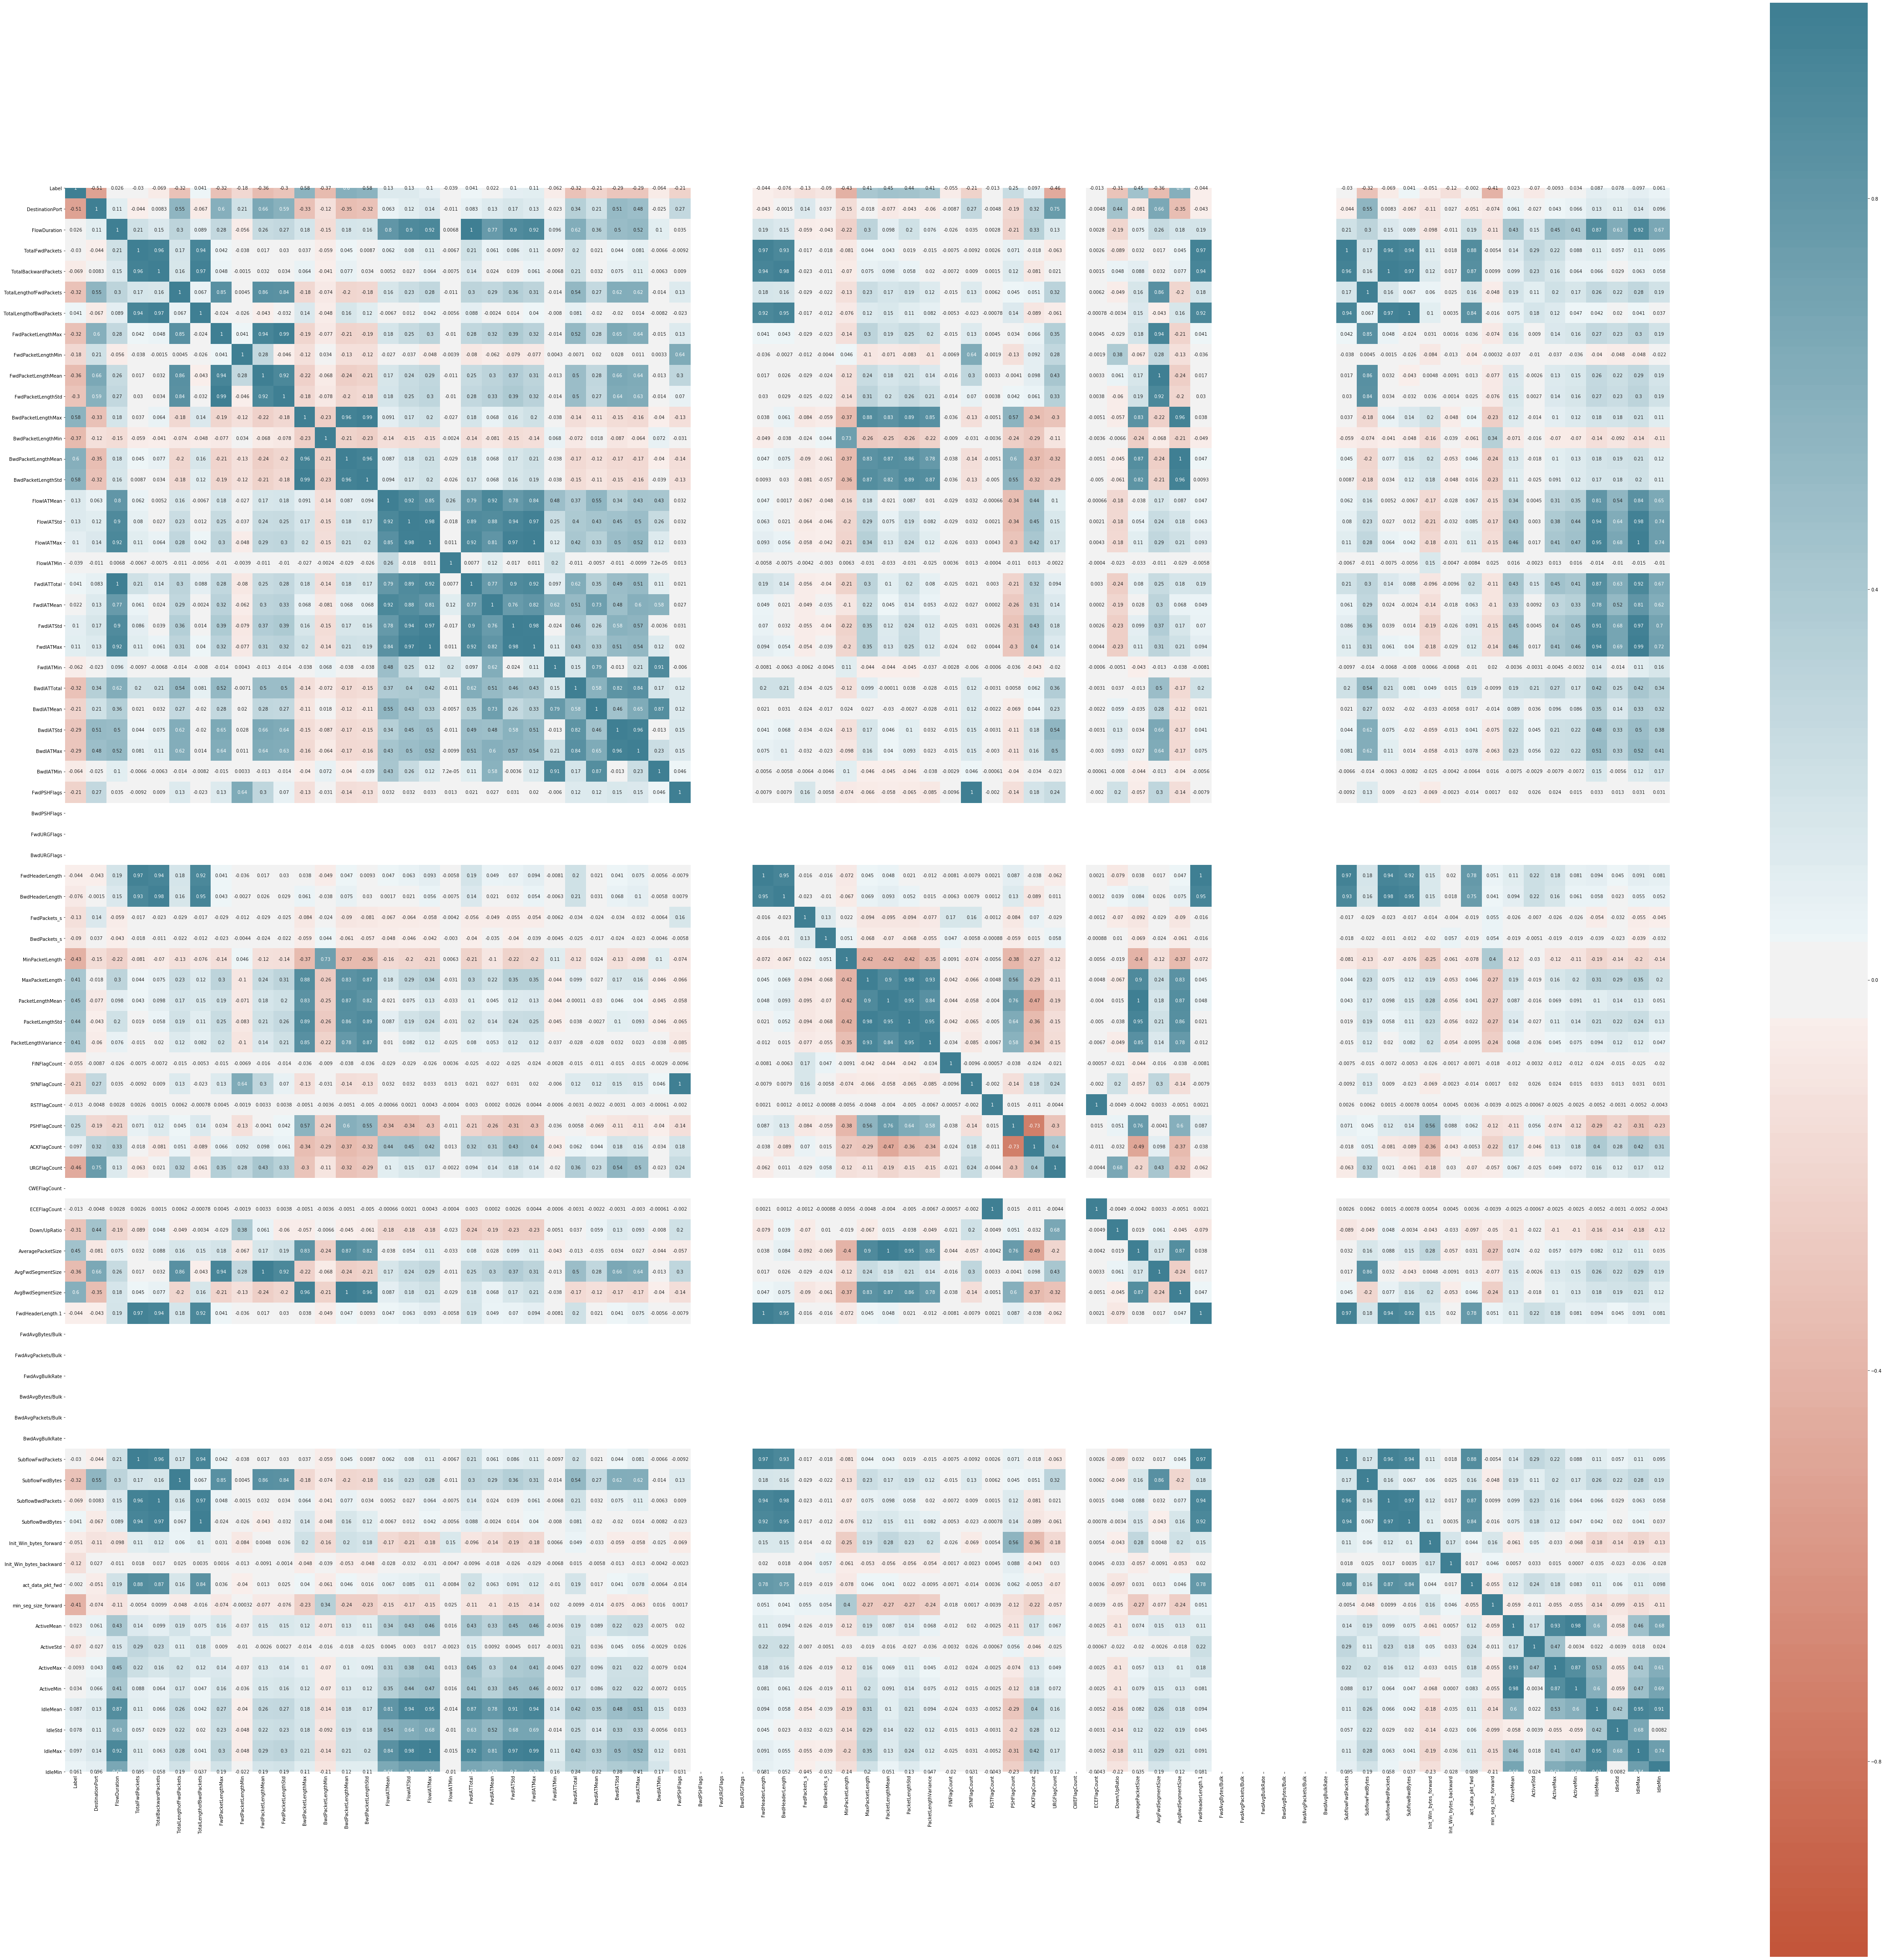

In [8]:
# Making a correlation map
corr = df.corr()
plt.figure(figsize=(79, 79))
heatMap = sns.heatmap(
    corr,
    vmin = -1, vmax = 1, center = 0,
    annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [ ]:
olist = list(df.columns) # original list
yvlist = list(['Label']) # y variable list

# make a new list of only the values I want to compare
xlist = [x for x in olist if x not in yvlist]

fig = plt.figure(figsize=(20, 25))
plotNum = 1
for key in xlist:
    ax = plt.subplot(6, 3, plotNum)
    ax.scatter(x=ben[key], y=ben['Label'])
    ax.set_xlabel(key)
    ax.set_ylabel('Label')
    plotNum = plotNum + 1